In [11]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [5]:
class AE(nn.Module):
	def __init__(self):
		super().__init__()
		self.encoder = nn.Sequential(
			nn.Linear(28 * 28, 128),
			nn.ReLU(),
			nn.Linear(128, 64),
			nn.ReLU(),
			nn.Linear(64, 36),
			nn.ReLU(),
			nn.Linear(36, 18),
			nn.ReLU(),
			nn.Linear(18, 9)
		)

		self.decoder = nn.Sequential(
			nn.Linear(9, 18),
			nn.ReLU(),
			nn.Linear(18, 36),
			nn.ReLU(),
			nn.Linear(36, 64),
			nn.ReLU(),
			nn.Linear(64, 128),
			nn.ReLU(),
			nn.Linear(128, 28 * 28),
			nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded

In [17]:
model = AE().to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-6)

In [24]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
  print("Epoch %d/%d:" % (epoch + 1, epochs))
  total_loss = 0
  for image, _ in tqdm(loader):
    image = image.reshape(-1, 28*28).to(device)
    reconstructed = model(image)
    loss = loss_function(reconstructed, image)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss
  losses.append(total_loss/len(loader))
  outputs.append((epochs, image, reconstructed))

losses = [loss.detach().cpu().numpy() for loss in losses]

Epoch 1/20:


100%|██████████| 1875/1875 [00:16<00:00, 116.82it/s]


Epoch 2/20:


100%|██████████| 1875/1875 [00:14<00:00, 125.82it/s]


Epoch 3/20:


100%|██████████| 1875/1875 [00:14<00:00, 125.52it/s]


Epoch 4/20:


100%|██████████| 1875/1875 [00:13<00:00, 142.20it/s]


Epoch 5/20:


100%|██████████| 1875/1875 [00:13<00:00, 142.17it/s]


Epoch 6/20:


100%|██████████| 1875/1875 [00:13<00:00, 142.87it/s]


Epoch 7/20:


100%|██████████| 1875/1875 [00:13<00:00, 138.84it/s]


Epoch 8/20:


100%|██████████| 1875/1875 [00:13<00:00, 142.83it/s]


Epoch 9/20:


100%|██████████| 1875/1875 [00:13<00:00, 143.71it/s]


Epoch 10/20:


100%|██████████| 1875/1875 [00:13<00:00, 142.73it/s]


Epoch 11/20:


100%|██████████| 1875/1875 [00:13<00:00, 143.46it/s]


Epoch 12/20:


100%|██████████| 1875/1875 [00:13<00:00, 143.86it/s]


Epoch 13/20:


100%|██████████| 1875/1875 [00:13<00:00, 143.06it/s]


Epoch 14/20:


100%|██████████| 1875/1875 [00:13<00:00, 140.90it/s]


Epoch 15/20:


100%|██████████| 1875/1875 [00:13<00:00, 142.54it/s]


Epoch 16/20:


100%|██████████| 1875/1875 [00:13<00:00, 144.09it/s]


Epoch 17/20:


100%|██████████| 1875/1875 [00:13<00:00, 143.51it/s]


Epoch 18/20:


100%|██████████| 1875/1875 [00:13<00:00, 143.11it/s]


Epoch 19/20:


100%|██████████| 1875/1875 [00:13<00:00, 142.64it/s]


Epoch 20/20:


100%|██████████| 1875/1875 [00:12<00:00, 144.29it/s]


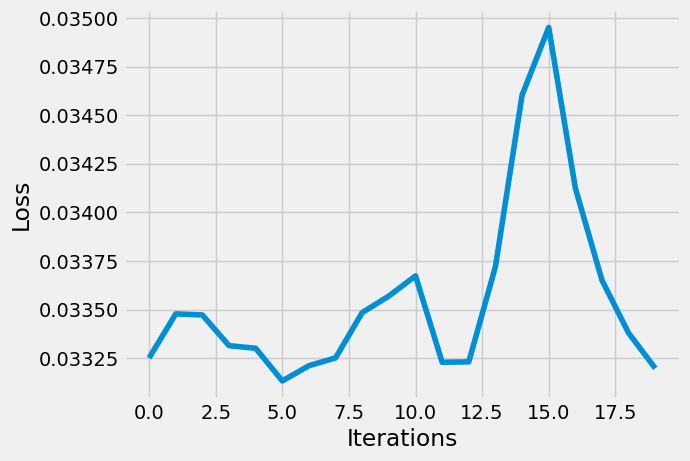

In [25]:
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses)

(1, 28, 28)


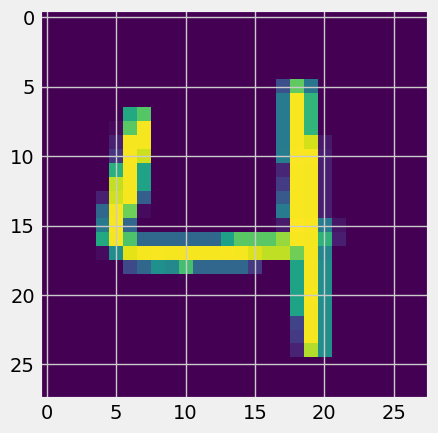

In [42]:
for i, item in enumerate(image):
  item = item.reshape(-1, 28, 28).detach().cpu().numpy()
  print(item.shape)
  plt.imshow(item[0])
  break

(1, 28, 28)


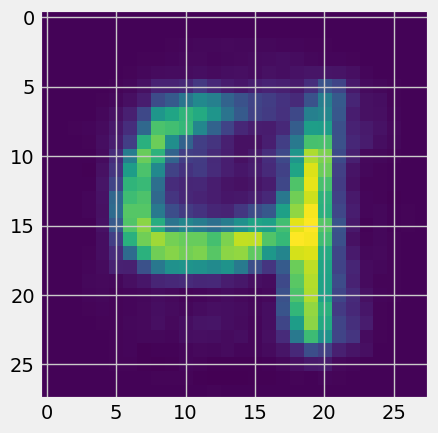

In [43]:
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28).detach().cpu().numpy()
  print(item.shape)
  plt.imshow(item[0])
  break